     outlook  temp humidity  windy play
0      sunny   hot     high  False   no
1      sunny   hot     high   True   no
2   overcast   hot     high  False  yes
3      rainy  mild     high  False  yes
4      rainy  cool   normal  False  yes
5      rainy  cool   normal   True   no
6   overcast  cool   normal   True  yes
7      sunny  mild     high  False   no
8      sunny  cool   normal  False  yes
9      rainy  mild   normal  False  yes
10     sunny  mild   normal   True  yes
11  overcast  mild     high   True  yes
12  overcast   hot   normal  False  yes
13     rainy  mild     high   True   no
outlook     object
temp        object
humidity    object
windy         bool
play        object
dtype: object
Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')
     outlook  temp humidity  windy
4      rainy  cool   normal  False
11  overcast  mild     high   True
2   overcast   hot     high  False
13     rainy  mild     high   True
9      rainy  mild   normal  False
1      su

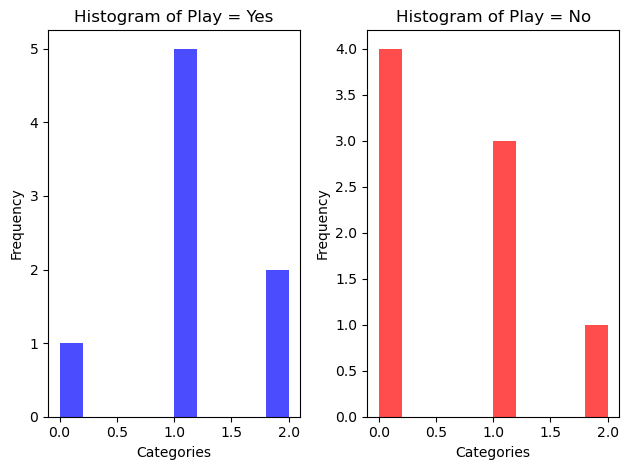

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv("tennis.csv")

# Display the dataset, its data types, and column names
print(df)
print(df.dtypes)
print(df.columns)

# Separate features (X) and target (y)
X = df.iloc[:, :-1]  # All rows, all columns except the last
y = df.iloc[:, -1]   # All rows, only the last column

# Split the dataset into training and testing sets (90% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Print the training and testing sets
print(X_train)
print(y_train)
print(X_test)
print(y_test)

# Create a pivot table to aggregate data based on "play", "outlook", and "temp"
pt = pd.pivot_table(df, index=["play"], columns=['outlook', 'temp'], aggfunc="size")
print(pt)

# Drop columns with missing values from the pivot table
pt.dropna(axis=1, inplace=True)
print(pt)

# Recreate the pivot table to fill missing values with zeros
pt = pd.pivot_table(df, index=["play"], columns=['outlook', 'temp'], aggfunc="size")
print(pt)

# Fill missing values in the pivot table with zeros
pt.fillna(0, axis=1, inplace=True)
print(pt)

# Create subplots to visualize data using histograms
plt.subplot(1, 2, 1)  # First subplot
plt.hist(pt.loc['yes'], color='blue', alpha=0.7, label='Play=Yes')  # Histogram for "yes"
plt.title("Histogram of Play = Yes")
plt.xlabel("Categories")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)  # Second subplot
plt.hist(pt.loc['no'], color='red', alpha=0.7, label='Play=No')  # Histogram for "no"
plt.title("Histogram of Play = No")
plt.xlabel("Categories")
plt.ylabel("Frequency")

# Show the plots
plt.tight_layout()
plt.show()
